In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv') 


In [3]:
train_data = train.copy()
test_data = test.copy()

In [4]:
train.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,2100001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,2100002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,2100003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,2100004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,2100005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [5]:
test.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,3100001,Female,NaN,36.0,Business travel,Business,532,0.0,0.0,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,3100002,Female,disloyal Customer,21.0,Business travel,Business,1425,9.0,28.0,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,3100003,Male,Loyal Customer,60.0,Business travel,Business,2832,0.0,0.0,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,3100004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,3100005,Male,disloyal Customer,18.0,Business travel,Business,1610,17.0,0.0,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [6]:
train.isnull().sum()

ID                            0
Gender                       77
CustomerType               8951
Age                          33
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

In [7]:
print(train.shape)
print(test.shape)

(94379, 25)
(35602, 24)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   CustomerType             85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   TypeTravel               85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   DepartureDelay_in_Mins   94322 non-null  float64
 8   ArrivalDelay_in_Mins     94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_time_convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_location     

In [9]:
categorical_data = train.select_dtypes(exclude= np.number)
categorical_col = categorical_data.columns
categorical_data.head(5)

,Gender,CustomerType,TypeTravel,Travel_Class,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,Female,Loyal Customer,NaN,Business,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,Male,Loyal Customer,Personal Travel,Eco,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,Female,Loyal Customer,Business travel,Business,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,Female,Loyal Customer,Business travel,Business,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,Female,Loyal Customer,Business travel,Business,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [10]:
categorical_data_test = test.select_dtypes(exclude= np.number)
categorical_col = categorical_data.columns
categorical_data_test.head(5)

,Gender,CustomerType,TypeTravel,Travel_Class,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,Female,NaN,Business travel,Business,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,Female,disloyal Customer,Business travel,Business,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,Male,Loyal Customer,Business travel,Business,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,Female,Loyal Customer,Personal Travel,Eco,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,Male,disloyal Customer,Business travel,Business,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [11]:
numeric_data = train.select_dtypes(include = np.number)
numeric_col = numeric_data.columns
numeric_data.head(5)

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience
0,2100001,52.0,272,0.0,5.0,0
1,2100002,48.0,2200,9.0,0.0,0
2,2100003,43.0,1061,77.0,119.0,1
3,2100004,44.0,780,13.0,18.0,0
4,2100005,50.0,1981,0.0,0.0,1


In [12]:
numeric_data.isnull().sum()

ID                          0
Age                        33
Travel_Distance             0
DepartureDelay_in_Mins     57
ArrivalDelay_in_Mins      357
Overall_Experience          0
dtype: int64

In [13]:
numeric_data_test = test.select_dtypes(include = np.number)
numeric_col = numeric_data.columns
numeric_data_test.head(5)

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,3100001,36.0,532,0.0,0.0
1,3100002,21.0,1425,9.0,28.0
2,3100003,60.0,2832,0.0,0.0
3,3100004,29.0,1352,0.0,0.0
4,3100005,18.0,1610,17.0,0.0


In [14]:
numeric_data_test.isnull().sum()

ID                          0
Age                        11
Travel_Distance             0
DepartureDelay_in_Mins     29
ArrivalDelay_in_Mins      123
dtype: int64

In [15]:
train.describe()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000,94379.000000
mean,2.147190e+06,39.419647,1978.888185,14.647092,15.005222,0.546658
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409,0.497821
min,2.100001e+06,7.000000,50.000000,0.000000,0.000000,0.000000
25%,2.123596e+06,27.000000,1359.000000,0.000000,0.000000,0.000000
50%,2.147190e+06,40.000000,1923.000000,0.000000,0.000000,1.000000
75%,2.170784e+06,51.000000,2538.000000,12.000000,13.000000,1.000000
max,2.194379e+06,85.000000,6951.000000,1592.000000,1584.000000,1.000000


In [16]:
test.describe()

,ID,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,3.560200e+04,35591.000000,35602.000000,35573.000000,35479.000000
mean,3.117802e+06,39.446995,1987.151761,14.880696,15.308802
std,1.027756e+04,15.137554,1024.308863,37.895453,38.531293
min,3.100001e+06,7.000000,50.000000,0.000000,0.000000
25%,3.108901e+06,27.000000,1360.000000,0.000000,0.000000
50%,3.117802e+06,40.000000,1929.000000,0.000000,0.000000
75%,3.126702e+06,51.000000,2559.000000,13.000000,13.000000
max,3.135602e+06,85.000000,6868.000000,978.000000,970.000000


In [17]:
for column in train.columns:
    if train[column].dtype == 'object':
        print(column.upper(),': ',train[column].nunique())
        print(train[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Male      46487
Female    47815
Name: Gender, dtype: int64


CUSTOMERTYPE :  2
disloyal Customer    15605
Loyal Customer       69823
Name: CustomerType, dtype: int64


TYPETRAVEL :  2
Personal Travel    26536
Business travel    58617
Name: TypeTravel, dtype: int64


TRAVEL_CLASS :  2
Business    45037
Eco         49342
Name: Travel_Class, dtype: int64


SEAT_COMFORT :  6
extremely poor       3463
excellent           12971
poor                15185
good                20595
need improvement    20946
acceptable          21158
Name: Seat_comfort, dtype: int64


SEAT_CLASS :  2
Ordinary     46944
Green Car    47435
Name: Seat_Class, dtype: int64


ARRIVAL_TIME_CONVENIENT :  6
extremely poor       4332
poor                13692
need improvement    14990
acceptable          15177
excellent           17684
good                19574
Name: Arrival_time_convenient, dtype: int64


CATERING :  6
extremely poor       3910
excellent           13455
poor                13858
good         

In [18]:
for column in test.columns:
    if train[column].dtype == 'object':
        print(column.upper(),': ',train[column].nunique())
        print(train[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Male      46487
Female    47815
Name: Gender, dtype: int64


CUSTOMERTYPE :  2
disloyal Customer    15605
Loyal Customer       69823
Name: CustomerType, dtype: int64


TYPETRAVEL :  2
Personal Travel    26536
Business travel    58617
Name: TypeTravel, dtype: int64


TRAVEL_CLASS :  2
Business    45037
Eco         49342
Name: Travel_Class, dtype: int64


SEAT_COMFORT :  6
extremely poor       3463
excellent           12971
poor                15185
good                20595
need improvement    20946
acceptable          21158
Name: Seat_comfort, dtype: int64


SEAT_CLASS :  2
Ordinary     46944
Green Car    47435
Name: Seat_Class, dtype: int64


ARRIVAL_TIME_CONVENIENT :  6
extremely poor       4332
poor                13692
need improvement    14990
acceptable          15177
excellent           17684
good                19574
Name: Arrival_time_convenient, dtype: int64


CATERING :  6
extremely poor       3910
excellent           13455
poor                13858
good         

In [19]:
train.drop(['ID'],axis=1,inplace=True) 
test.drop(['ID'],axis=1,inplace=True) 

In [20]:
train.duplicated().sum()

27

In [21]:
test.duplicated().sum() 

2

In [22]:
print('number of rows in train set before removing duplicates',train.duplicated().sum())
train.drop_duplicates(inplace=True)
print('number of rows in train set after removing duplicates',train.duplicated().sum())

number of rows in train set before removing duplicates 27
number of rows in train set after removing duplicates 0


Shape before Outliers Treatment (94352, 24)


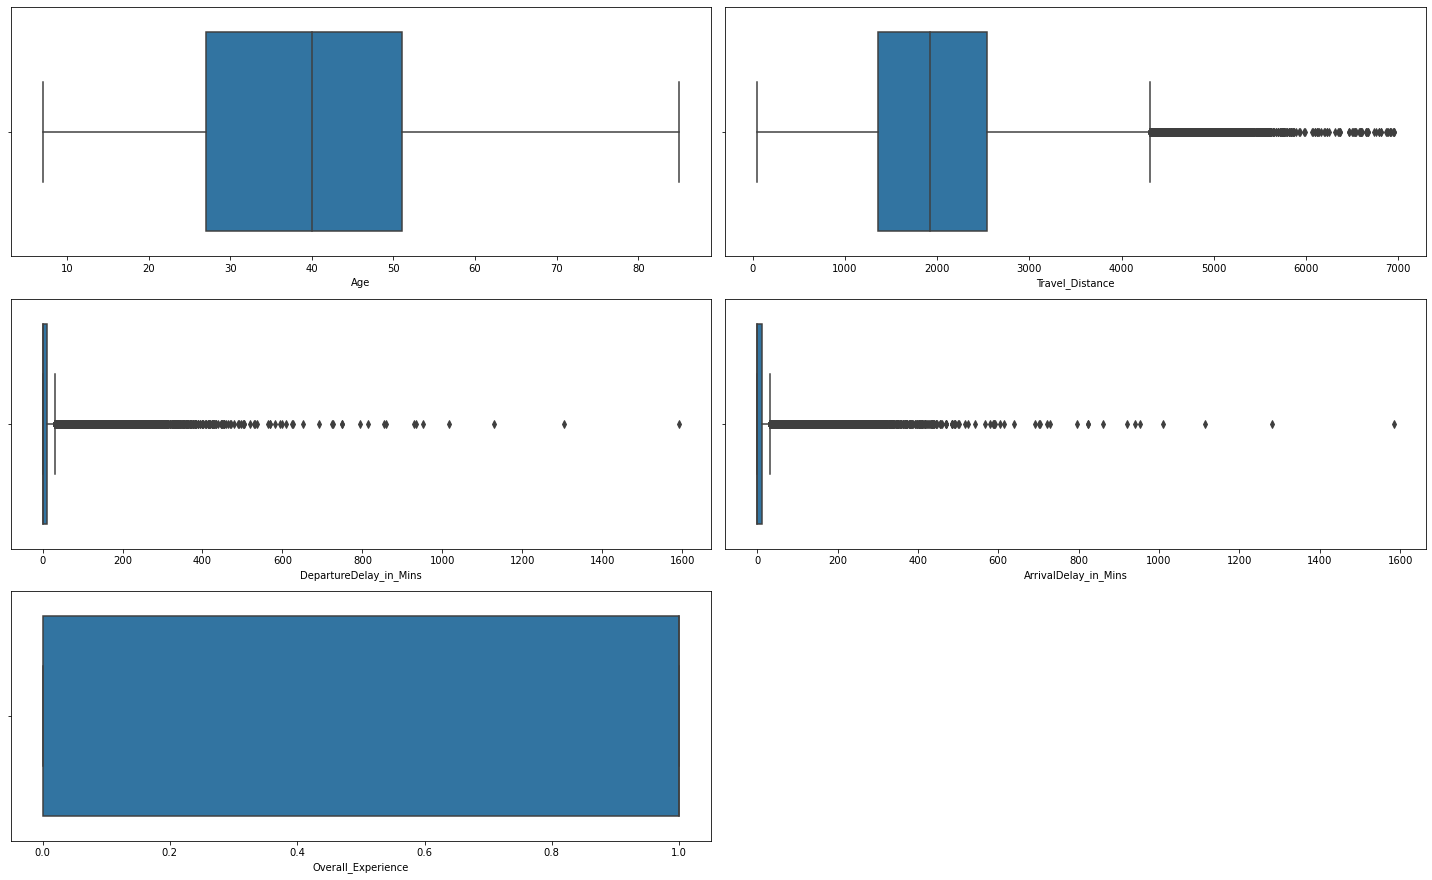

In [23]:
data_plot=train[['Age', 'Travel_Distance', 'DepartureDelay_in_Mins',
       'ArrivalDelay_in_Mins', 'Overall_Experience']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',train.shape)

Shape before Outliers Treatment (35602, 23)


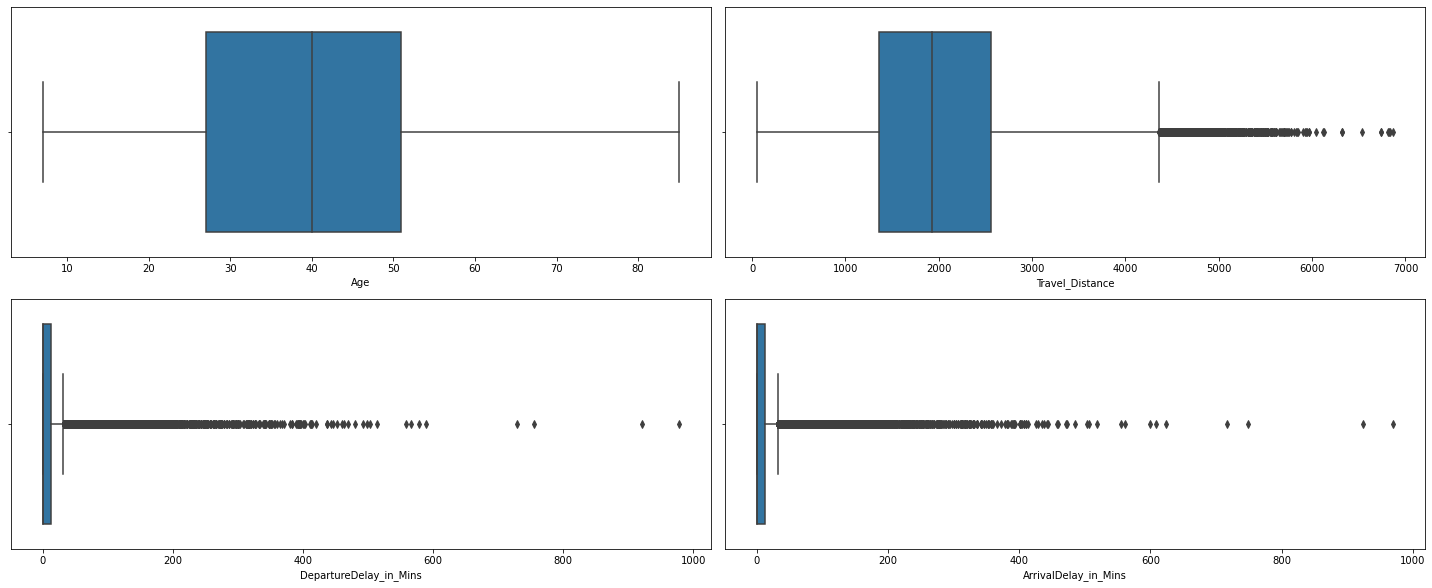

In [24]:
data_plot_test=test[['Age', 'Travel_Distance', 'DepartureDelay_in_Mins',
       'ArrivalDelay_in_Mins']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot_test.columns)):
    ax=fig.add_subplot(5,2,i+1)
    sns.boxplot(data_plot_test[data_plot_test.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',test.shape)

In [29]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5* IQR)
    upper_range = Q3+(1.5* IQR)
    return lower_range,upper_range

In [30]:
lrincome,urincome=remove_outlier(train['DepartureDelay_in_Mins'])
train['DepartureDelay_in_Mins']=np.where(train['DepartureDelay_in_Mins']>urincome,urincome,train['DepartureDelay_in_Mins'])
train['DepartureDelay_in_Mins']=np.where(train['DepartureDelay_in_Mins']<lrincome,lrincome,train['DepartureDelay_in_Mins']) 

lrincome,urincome=remove_outlier(train['Travel_Distance'])
train['Travel_Distance']=np.where(train['Travel_Distance']>urincome,urincome,train['Travel_Distance'])
train['Travel_Distance']=np.where(train['Travel_Distance']<lrincome,lrincome,train['Travel_Distance'])

lrincome,urincome=remove_outlier(train['ArrivalDelay_in_Mins'])
train['ArrivalDelay_in_Mins']=np.where(train['ArrivalDelay_in_Mins']>urincome,urincome,train['ArrivalDelay_in_Mins'])
train['ArrivalDelay_in_Mins']=np.where(train['ArrivalDelay_in_Mins']<lrincome,lrincome,train['ArrivalDelay_in_Mins'])

lrincome,urincome=remove_outlier(test['DepartureDelay_in_Mins'])
test['DepartureDelay_in_Mins']=np.where(test['DepartureDelay_in_Mins']>urincome,urincome,test['DepartureDelay_in_Mins'])
test['DepartureDelay_in_Mins']=np.where(test['DepartureDelay_in_Mins']<lrincome,lrincome,test['DepartureDelay_in_Mins']) 

lrincome,urincome=remove_outlier(test['Travel_Distance'])
test['Travel_Distance']=np.where(test['Travel_Distance']>urincome,urincome,test['Travel_Distance'])
test['Travel_Distance']=np.where(test['Travel_Distance']<lrincome,lrincome,test['Travel_Distance'])

lrincome,urincome=remove_outlier(test['ArrivalDelay_in_Mins'])
test['ArrivalDelay_in_Mins']=np.where(test['ArrivalDelay_in_Mins']>urincome,urincome,test['ArrivalDelay_in_Mins'])
test['ArrivalDelay_in_Mins']=np.where(test['ArrivalDelay_in_Mins']<lrincome,lrincome,test['ArrivalDelay_in_Mins'])

Shape after Outliers Treatment (94352, 24)


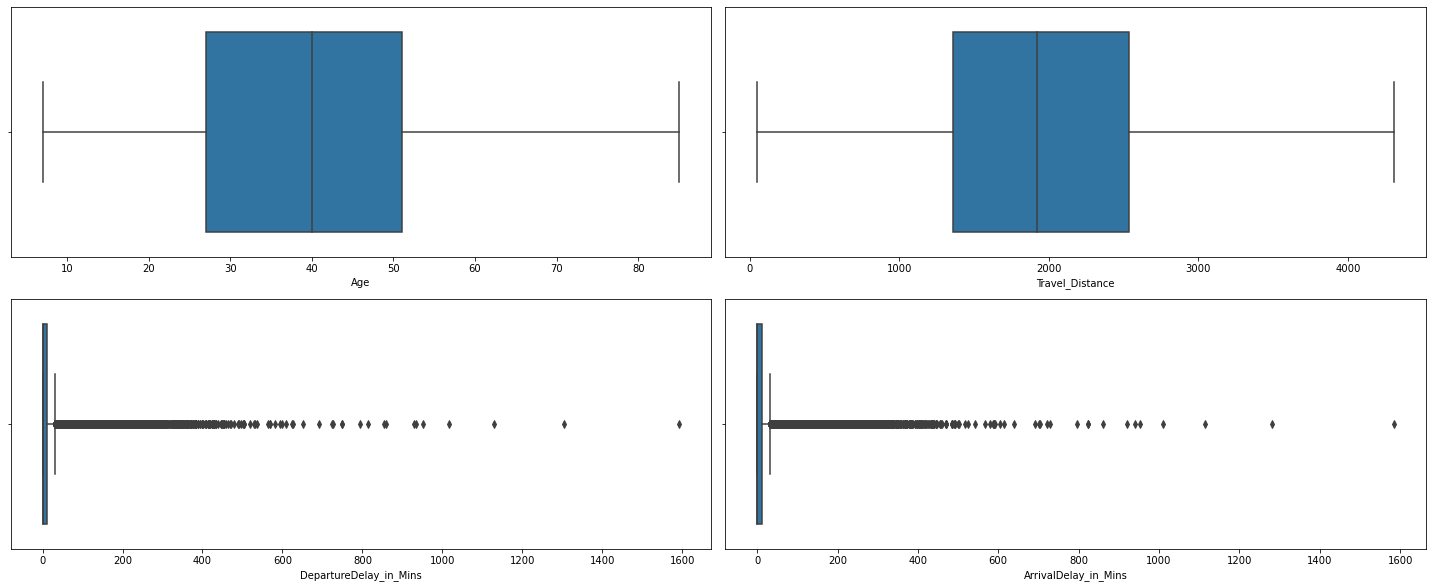

In [33]:
data_plot=train[['Age', 'Travel_Distance', 'DepartureDelay_in_Mins',
       'ArrivalDelay_in_Mins']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape after Outliers Treatment',train.shape)

Shape after Outliers Treatment (35602, 23)


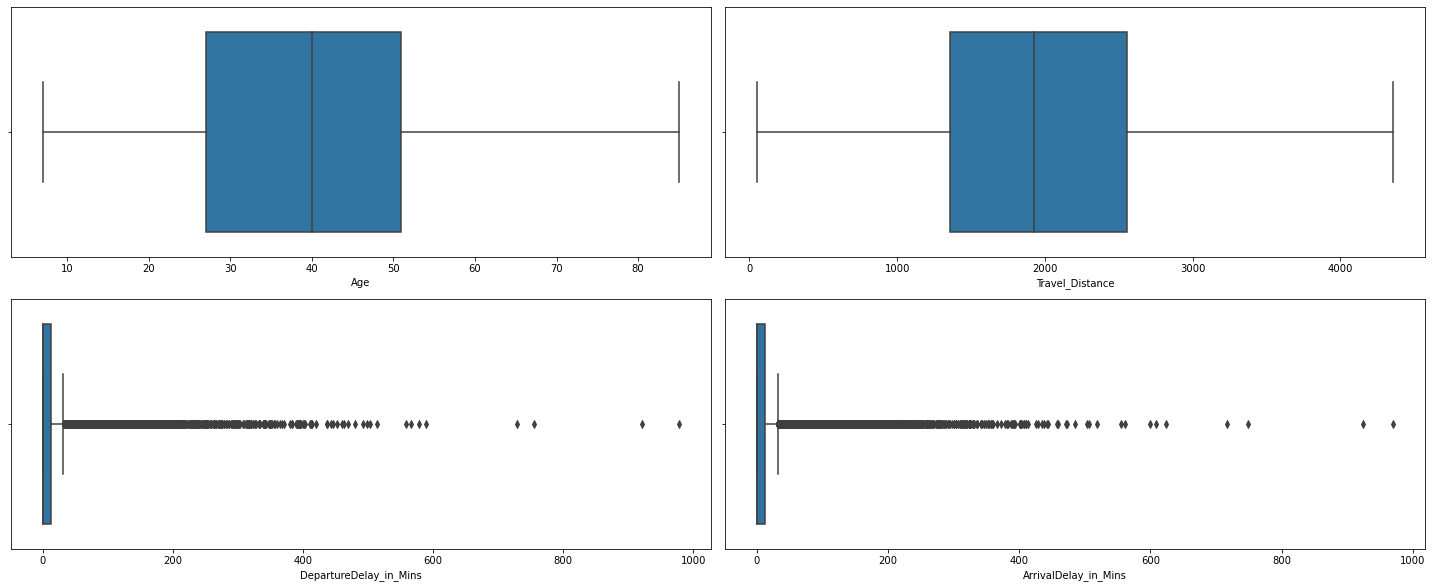

In [34]:
data_plot_test=test[['Age', 'Travel_Distance', 'DepartureDelay_in_Mins',
       'ArrivalDelay_in_Mins']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot_test.columns)):
    ax=fig.add_subplot(5,2,i+1)
    sns.boxplot(data_plot_test[data_plot_test.columns[i]])
    plt.tight_layout()
print('Shape after Outliers Treatment',test.shape)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94352 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94275 non-null  object 
 1   CustomerType             85403 non-null  object 
 2   Age                      94319 non-null  float64
 3   TypeTravel               85132 non-null  object 
 4   Travel_Class             94352 non-null  object 
 5   Travel_Distance          94352 non-null  float64
 6   DepartureDelay_in_Mins   94295 non-null  float64
 7   ArrivalDelay_in_Mins     93995 non-null  float64
 8   Overall_Experience       94352 non-null  int64  
 9   Seat_comfort             94291 non-null  object 
 10  Seat_Class               94352 non-null  object 
 11  Arrival_time_convenient  85424 non-null  object 
 12  Catering                 85612 non-null  object 
 13  Platform_location        94322 non-null  object 
 14  Onboardwifi_service   

In [35]:
objects=train.select_dtypes(include=['object','category']).columns
non_objects=train.select_dtypes(exclude=['object','category']).columns

In [40]:
non_objects

Index(['Age', 'Travel_Distance', 'DepartureDelay_in_Mins',
       'ArrivalDelay_in_Mins', 'Overall_Experience'],
      dtype='object')

In [41]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer= imputer.fit(train[non_objects].iloc[:,:])

In [42]:
train[non_objects]=imputer.transform(train[non_objects])

In [43]:
train.isnull().sum()

Gender                       77
CustomerType               8949
Age                           0
TypeTravel                 9220
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins        0
ArrivalDelay_in_Mins          0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8928
Catering                   8740
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7599
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',verbose=0)
imputer= imputer.fit(train[objects].iloc[:,:])

In [33]:
train[objects]=imputer.transform(train[objects])

In [34]:
train.isnull().sum()

Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
dtype: int64

In [35]:
test.isnull().sum()

Gender                       30
CustomerType               3383
Age                          11
TypeTravel                 3448
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       29
ArrivalDelay_in_Mins        123
Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
dtype: int64

In [36]:
objects=test.select_dtypes(include=['object','category']).columns
non_objects=test.select_dtypes(exclude=['object','category']).columns

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer= imputer.fit(test[non_objects].iloc[:,:])

In [38]:
test[non_objects]=imputer.transform(test[non_objects])

In [39]:
test.isnull().sum() 

Gender                       30
CustomerType               3383
Age                           0
TypeTravel                 3448
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins        0
ArrivalDelay_in_Mins          0
Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
dtype: int64

In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',verbose=0)
imputer= imputer.fit(test[objects].iloc[:,:])

In [41]:
test[objects]=imputer.transform(test[objects])

In [42]:
test.isnull().sum()

Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
dtype: int64

In [43]:
for feature in train.columns: 
    if train[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(train[feature].unique()))



feature: Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']


feature: CustomerType
['Loyal Customer', 'disloyal Customer']
Categories (2, object): ['Loyal Customer', 'disloyal Customer']


feature: TypeTravel
['Business travel', 'Personal Travel']
Categories (2, object): ['Business travel', 'Personal Travel']


feature: Travel_Class
['Business', 'Eco']
Categories (2, object): ['Business', 'Eco']


feature: Seat_comfort
['need improvement', 'poor', 'acceptable', 'good', 'excellent', 'extremely poor']
Categories (6, object): ['acceptable', 'excellent', 'extremely poor', 'good', 'need improvement', 'poor']


feature: Seat_Class
['Green Car', 'Ordinary']
Categories (2, object): ['Green Car', 'Ordinary']


feature: Arrival_time_convenient
['excellent', 'need improvement', 'acceptable', 'good', 'poor', 'extremely poor']
Categories (6, object): ['acceptable', 'excellent', 'extremely poor', 'good', 'need improvement', 'poor']


feature: Catering
['excellent', 'poor', 'need

In [44]:
for feature in test.columns: 
    if test[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(test[feature].unique()))



feature: Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']


feature: CustomerType
['Loyal Customer', 'disloyal Customer']
Categories (2, object): ['Loyal Customer', 'disloyal Customer']


feature: TypeTravel
['Business travel', 'Personal Travel']
Categories (2, object): ['Business travel', 'Personal Travel']


feature: Travel_Class
['Business', 'Eco']
Categories (2, object): ['Business', 'Eco']


feature: Seat_comfort
['acceptable', 'extremely poor', 'excellent', 'poor', 'need improvement', 'good']
Categories (6, object): ['acceptable', 'excellent', 'extremely poor', 'good', 'need improvement', 'poor']


feature: Seat_Class
['Green Car', 'Ordinary']
Categories (2, object): ['Green Car', 'Ordinary']


feature: Arrival_time_convenient
['acceptable', 'good', 'excellent', 'extremely poor', 'need improvement', 'poor']
Categories (6, object): ['acceptable', 'excellent', 'extremely poor', 'good', 'need improvement', 'poor']


feature: Catering
['acceptable', 'poor', 'exc

In [45]:
train.Gender.replace(['Female', 'Male'],['0','1'],inplace=True)  
train.CustomerType.replace(['Loyal Customer', 'disloyal Customer'],['0','1'],inplace=True)  
train.TypeTravel.replace(['Business travel', 'Personal Travel'],['0','1'],inplace=True)  
train.Travel_Class.replace(['Business', 'Eco'],['0','1'],inplace=True) 
train.Seat_comfort.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True) 
train.Seat_Class.replace(['Green Car', 'Ordinary'],['1','0'],inplace=True) 
train.Arrival_time_convenient.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
train.Catering.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
train.Platform_location.replace(['very convinient','Convinient','manageable','need improvement','Inconvinient','very inconvinient'],['5','4','3','2','1','0'],inplace=True)  
train.Onboardwifi_service.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
train.Onboard_entertainment.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
train.Online_support.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
train.Onlinebooking_Ease.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
train.Onboard_service.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
train.Leg_room.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
train.Baggage_handling.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
train.Checkin_service.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
train.Cleanliness.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
train.Online_boarding.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  


In [46]:
test.Gender.replace(['Female', 'Male'],['0','1'],inplace=True)  
test.CustomerType.replace(['Loyal Customer', 'disloyal Customer'],['0','1'],inplace=True)  
test.TypeTravel.replace(['Business travel', 'Personal Travel'],['0','1'],inplace=True)  
test.Travel_Class.replace(['Business', 'Eco'],['0','1'],inplace=True) 
test.Seat_comfort.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True) 
test.Seat_Class.replace(['Green Car', 'Ordinary'],['1','0'],inplace=True) 
test.Arrival_time_convenient.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
test.Catering.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
test.Platform_location.replace(['very convinient','Convinient','manageable','need improvement','Inconvinient','very inconvinient'],['5','4','3','2','1','0'],inplace=True)  
test.Onboardwifi_service.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
test.Onboard_entertainment.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
test.Online_support.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
test.Onlinebooking_Ease.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
test.Onboard_service.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
test.Leg_room.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
test.Baggage_handling.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
test.Checkin_service.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
test.Cleanliness.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  
test.Online_boarding.replace(['excellent','good','acceptable','need improvement','poor','extremely poor'],['5','4','3','2','1','0'],inplace=True)  

In [47]:
print('number of duplicates in train are',train.duplicated().sum()) 
train.drop_duplicates(inplace=True) 

number of duplicates in train are 1


In [48]:
train.duplicated().sum()

0

In [49]:
train.head(3)

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,0,0,52.0,0,0,272.0,0.0,5.0,0.0,2,1,5,5,5,4,2,3,2,2,3,2,4,2,1
1,1,0,48.0,1,1,2200.0,9.0,0.0,0.0,1,0,5,1,2,4,1,4,4,5,2,1,2,4,4
2,0,0,43.0,0,0,1061.0,77.0,119.0,1.0,2,1,2,2,2,2,4,5,5,5,5,5,4,5,5


In [50]:
test.head(3)

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,0,0,36.0,0,0,532.0,0.0,0.0,3,1,3,3,3,2,5,4,5,5,5,5,4,5,1
1,0,1,21.0,0,0,1425.0,9.0,28.0,0,0,4,1,3,3,1,3,3,5,3,4,3,5,3
2,1,0,60.0,0,0,2832.0,0.0,0.0,5,0,5,5,5,5,5,5,2,2,2,2,4,2,5


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94351 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94351 non-null  object 
 1   CustomerType             94351 non-null  object 
 2   Age                      94351 non-null  float64
 3   TypeTravel               94351 non-null  object 
 4   Travel_Class             94351 non-null  object 
 5   Travel_Distance          94351 non-null  float64
 6   DepartureDelay_in_Mins   94351 non-null  float64
 7   ArrivalDelay_in_Mins     94351 non-null  float64
 8   Overall_Experience       94351 non-null  float64
 9   Seat_comfort             94351 non-null  object 
 10  Seat_Class               94351 non-null  object 
 11  Arrival_time_convenient  94351 non-null  object 
 12  Catering                 94351 non-null  object 
 13  Platform_location        94351 non-null  object 
 14  Onboardwifi_service   

<AxesSubplot:>

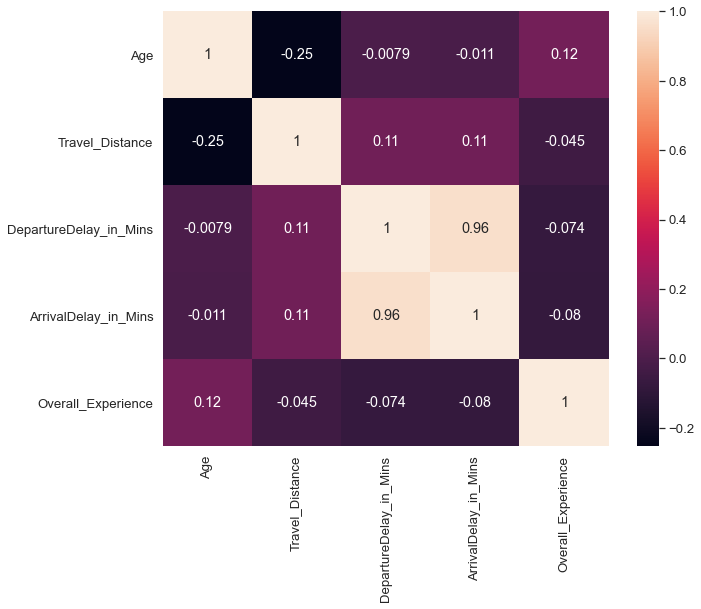

In [52]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(train.corr(), annot=True) 

In [53]:
X = train.drop(['Overall_Experience'], axis=1)
y = train[['Overall_Experience']]

In [54]:
print('Train_data',train.shape)
print('Test_Data',test.shape)

Train_data (94351, 24)
Test_Data (35602, 23)


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## CART

In [56]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [20],
    'min_samples_leaf': [3], 
    'min_samples_split': [10],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 5) 

In [57]:
grid_search.fit(X,y)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 10}


DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=3,
                       min_samples_split=10, random_state=1)

In [58]:
cart_train_acc=best_grid.score(X,y) 
cart_train_acc

0.9719133872454981

In [59]:
cart_train_acc=best_grid.score(X,y) 
cart_train_acc

0.9719133872454981

In [60]:
train_predict = best_grid.predict(X)
test_predict = best_grid.predict(test)

In [61]:
test_data['Overall_Experience'] = test_predict 

In [62]:
Submittion_cart = test_data[['ID','Overall_Experience']]

In [63]:
Submittion_cart.to_csv('Sharath_cart.csv',index=False) 

## RANDOM FOREST

In [387]:
param_grid = {
    'max_depth': [9],
    'max_features': [9],
    'min_samples_leaf': [0.000001],
    'min_samples_split': [0.000001], 
    'n_estimators': [6] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [388]:
grid_search.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [25], 'max_features': [15],
                         'min_samples_leaf': [1e-06],
                         'min_samples_split': [1e-06], 'n_estimators': [8]})

In [389]:
grid_search.best_params_

{'max_depth': 25,
 'max_features': 15,
 'min_samples_leaf': 1e-06,
 'min_samples_split': 1e-06,
 'n_estimators': 8}

In [390]:
best_grid = grid_search.best_estimator_

In [391]:
best_grid

RandomForestClassifier(max_depth=25, max_features=15, min_samples_leaf=1e-06,
                       min_samples_split=1e-06, n_estimators=8, random_state=1)

In [392]:
rf_train_acc=grid_search.score(X,y) 
rf_train_acc

0.9952835688016025

In [213]:
rf_train_acc=grid_search.score(X,y) 
rf_train_acc

0.998738752106496

In [214]:
#25 15 2 3 6
rf_train_acc=grid_search.score(X,y) 
rf_train_acc

0.998738752106496

In [215]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X.columns).sort_values('Imp',ascending=False))

                              Imp
Onboard_entertainment    0.345027
Seat_comfort             0.157820
Onlinebooking_Ease       0.077634
Online_support           0.040742
Travel_Distance          0.032952
Age                      0.029697
CustomerType             0.027036
Leg_room                 0.025345
Catering                 0.024202
Platform_location        0.022245
Online_boarding          0.021203
Travel_Class             0.021061
Checkin_service          0.020152
TypeTravel               0.019936
Cleanliness              0.018805
Gender                   0.018021
Baggage_handling         0.017310
Onboardwifi_service      0.017102
Arrival_time_convenient  0.016627
Onboard_service          0.016560
ArrivalDelay_in_Mins     0.014726
DepartureDelay_in_Mins   0.012787
Seat_Class               0.003009


In [393]:
random_test_predict = grid_search.predict(test)

In [394]:
random_test_predict

array([1., 1., 1., ..., 1., 1., 0.])

In [395]:
test_data['Overall_Experience'] = random_test_predict 

In [396]:
Submittion_random = test_data[['ID','Overall_Experience']]

In [397]:
Submittion_random.to_csv('Sharath_RF.csv',index=False) 

## Bagging

In [398]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
Bagging_model=BaggingClassifier(base_estimator=best_grid,n_estimators=3,random_state=1)
Bagging_model.fit(X, y)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=25,
                                                        max_features=15,
                                                        min_samples_leaf=1e-06,
                                                        min_samples_split=1e-06,
                                                        n_estimators=8,
                                                        random_state=1),
                  n_estimators=3, random_state=1)

In [399]:
ytrain_predict = Bagging_model.predict(X)
model_score = Bagging_model.score(X,y)
print(model_score)

0.9860520821188965


In [400]:
Bagging_test_predict = Bagging_model.predict(test)

In [401]:
Bagging_test_predict

array([1., 1., 1., ..., 0., 1., 0.])

In [402]:
test_data['Overall_Experience'] = Bagging_test_predict 

In [403]:
Submittion_Bag = test_data[['ID','Overall_Experience']]

In [380]:
Submittion_Bag.to_csv('Sharath_BAG.csv',index=False) 

### GRADIENT

In [432]:
param_grid = {
    'max_depth': [8],
    'max_features': [8],
    'min_samples_leaf': [80],
    'min_samples_split': [500], 
    'n_estimators': [500] 
}

#rfcl = RandomForestClassifier(random_state=1)

#grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 7)

In [433]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(learning_rate=0.1,subsample=0.8)
grid_search = GridSearchCV(estimator = gbcl, param_grid = param_grid, cv = 3)

In [434]:
grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(subsample=0.8),
             param_grid={'max_depth': [8], 'max_features': [8],
                         'min_samples_leaf': [80], 'min_samples_split': [500],
                         'n_estimators': [500]})

In [435]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 8,
 'min_samples_leaf': 80,
 'min_samples_split': 500,
 'n_estimators': 500}

In [436]:
best_grid1 = grid_search.best_estimator_

In [437]:
best_grid1

GradientBoostingClassifier(max_depth=8, max_features=8, min_samples_leaf=80,
                           min_samples_split=500, n_estimators=500,
                           subsample=0.8)

In [438]:
gbcl_acc=grid_search.score(X,y) 
gbcl_acc

0.9863806424945152

In [227]:
gbcl_acc=grid_search.score(X,y) 
gbcl_acc

0.9948490212080423

In [96]:
## Highest 9,9,70,500,500 cv 3
gbcl_acc=grid_search.score(X,y) 
gbcl_acc

0.9931956206081547

In [428]:
gbcl_test_predict = grid_search.predict(test)

In [429]:
test_data['Overall_Experience'] = gbcl_test_predict

In [430]:
Submittion_GBCL = test_data[['ID','Overall_Experience']]

In [431]:
Submittion_GBCL .to_csv('Sharath_gbcl.csv',index=False) 

### XGB

In [192]:
for feature in X.columns: 
    if X[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(X[feature].unique()).codes)
        X[feature] = pd.Categorical(X[feature]).codes

In [193]:
for feature in test.columns: 
    if test[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(test[feature].unique()).codes)
        test[feature] = pd.Categorical(test[feature]).codes

In [200]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [201]:
import xgboost as xgb

In [202]:
from xgboost import XGBClassifier

In [251]:
param_grid = {
    'nthread':[4],
    'objective':['binary:logistic'],
    'learning_rate': [0.20],
    'max_depth': [10], 
    'n_estimators': [10] 
}

In [252]:
XG = XGBClassifier()
grid_search = GridSearchCV(estimator = XG, param_grid = param_grid, cv = 5,)

In [253]:
grid_search.fit(X,y)

[12:23:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:23:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [254]:
grid_search.best_params_

{'learning_rate': 0.2,
 'max_depth': 10,
 'n_estimators': 10,
 'nthread': 4,
 'objective': 'binary:logistic'}

In [255]:
best_grid = grid_search.best_estimator_

In [256]:
best_grid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [257]:
XGB_acc=grid_search.score(X,y) 
XGB_acc

0.9552204004197093

In [258]:
xgb_test_predict = grid_search.predict(test)

In [259]:
test_data['Overall_Experience'] = xgb_test_predict

In [260]:
Submittion_XGB = test_data[['ID','Overall_Experience']]

In [261]:
Submittion_XGB.to_csv('Sharath_XGB.csv',index=False) 

## Naive 

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [78]:
NB_model = GaussianNB()
NB_model.fit(X,y)

GaussianNB()

In [79]:
y_train_predict = NB_model.predict(X)
model_score = NB_model.score(X,y)
print(model_score)
print(metrics.confusion_matrix(y, y_train_predict))
print(metrics.classification_report(y, y_train_predict))

0.8160273870971161
[[33696  9075]
 [ 8283 43297]]
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80     42771
         1.0       0.83      0.84      0.83     51580

    accuracy                           0.82     94351
   macro avg       0.81      0.81      0.81     94351
weighted avg       0.82      0.82      0.82     94351



In [80]:
naive_test_predict = NB_model.predict(test)

In [81]:
test_data['Overall_Experience'] = naive_test_predict

In [82]:
Submittion_naive = test_data[['ID','Overall_Experience']]

In [83]:
Submittion_naive.to_csv('Sharath_naive.csv',index=False) 

### LDA

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X,y)

LinearDiscriminantAnalysis()

In [85]:
y_train_predict = LDA_model.predict(X)
model_score = LDA_model.score(X, y)
print(model_score)
print(metrics.confusion_matrix(y, y_train_predict))
print(metrics.classification_report(y, y_train_predict))

0.8328899534716113
[[34586  8185]
 [ 7582 43998]]
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81     42771
         1.0       0.84      0.85      0.85     51580

    accuracy                           0.83     94351
   macro avg       0.83      0.83      0.83     94351
weighted avg       0.83      0.83      0.83     94351



## ADA Boost

In [180]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(algorithm='SAMME.R',random_state=1)
ADB_model.fit(X,y)

AdaBoostClassifier(random_state=1)

In [181]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X)
model_score = ADB_model.score(X, y)
print(model_score)


0.8960265391993726


In [171]:
ADA_predict = ADB_model.predict(test)

In [172]:
test_data['Overall_Experience'] = ADA_predict

In [173]:
Submittion_ADA = test_data[['ID','Overall_Experience']]

In [174]:
Submittion_ADA.to_csv('Sharath_ADA.csv',index=False) 

## MINMAX

In [60]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
minmax_scale

MinMaxScaler()

In [61]:
X['Age'] = minmax_scale.fit_transform(X[['Age']]) 
X['Travel_Distance'] = minmax_scale.fit_transform(X[['Travel_Distance']]) 
X['DepartureDelay_in_Mins'] = minmax_scale.fit_transform(X[['DepartureDelay_in_Mins']]) 
X['ArrivalDelay_in_Mins'] = minmax_scale.fit_transform(X[['ArrivalDelay_in_Mins']]) 

In [62]:
X.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,0,0,0.576923,0,0,0.052156,0.000000,0.003157,2,1,5,5,5,4,2,3,2,2,3,2,4,2,1
1,1,0,0.525641,1,1,0.505110,0.005653,0.000000,1,0,5,1,2,4,1,4,4,5,2,1,2,4,4
2,0,0,0.461538,0,0,0.237519,0.048367,0.075126,2,1,2,2,2,2,4,5,5,5,5,5,4,5,5
3,0,0,0.474359,0,0,0.171502,0.008166,0.011364,3,0,2,3,2,3,2,3,3,3,3,3,4,3,3
4,0,0,0.551282,0,0,0.453659,0.000000,0.000000,3,0,3,3,3,2,4,5,4,4,4,4,4,4,4


## NEURAL NETWORK

In [161]:
param_grid = {
    'hidden_layer_sizes': [30], # 50, 200
    'max_iter': [500], #5000,2500
    'solver': ['adam'], #sgd, adam
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

In [162]:
grid_search.fit(X,y)
grid_search.best_params_

{'hidden_layer_sizes': 30, 'max_iter': 500, 'solver': 'adam', 'tol': 0.01}

In [163]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=30, max_iter=500, random_state=1, tol=0.01)

In [164]:
Neural_network_acc=best_grid.score(X,y) 
Neural_network_acc

0.8141090184523746

In [160]:
#300 5000
Neural_network_acc=best_grid.score(X,y) 
Neural_network_acc

0.8583480832211635

### XG BOOST

In [102]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier

In [136]:
param_grid = {
    'max_depth': [8],
    'max_features': [8],
    'min_samples_leaf': [60],
    'min_samples_split': [600], 
    'n_estimators': [600] 
}

#rfcl = RandomForestClassifier(random_state=1)

#grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 7)

In [137]:
xgb = XGBClassifier(learning_rate=0.1,subsample=0.8)
grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5)

In [138]:
grid_search.fit(X, y)

[16:24:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:24:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:25:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.8,
                                     tree_method=None, v

In [139]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 8,
 'min_samples_leaf': 60,
 'min_samples_split': 600,
 'n_estimators': 600}

In [140]:
best_grid1 = grid_search.best_estimator_

In [141]:
best_grid1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8, max_features=8,
              min_child_weight=1, min_samples_leaf=60, min_samples_split=600,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=8, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [142]:
xgb_acc=grid_search.score(X,y) 
xgb_acc

0.9988765354898199

In [85]:
## Highest 8,8,60,600,600 cv 3 accuracy of 0.9544127
gbcl_acc=grid_search.score(X,y) 
gbcl_acc

0.9903445644455279

In [143]:
xgb_test_predict = grid_search.predict(test)

In [144]:
test_data['Overall_Experience'] = xgb_test_predict

In [145]:
Submittion_XGB = test_data[['ID','Overall_Experience']]

In [146]:
Submittion_XGB .to_csv('Sharath_XGB.csv',index=False) 

In [107]:
for feature in X.columns: 
    if X[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(X[feature].unique()))
        print(pd.Categorical(X[feature].unique()).codes)
        X[feature] = pd.Categorical(X[feature]).codes



feature: Gender
['0', '1']
Categories (2, object): ['0', '1']
[0 1]


feature: CustomerType
['0', '1']
Categories (2, object): ['0', '1']
[0 1]


feature: TypeTravel
['0', '1']
Categories (2, object): ['0', '1']
[0 1]


feature: Travel_Class
['0', '1']
Categories (2, object): ['0', '1']
[0 1]


feature: Seat_comfort
['2', '1', '3', '4', '5', '0']
Categories (6, object): ['0', '1', '2', '3', '4', '5']
[2 1 3 4 5 0]


feature: Seat_Class
['1', '0']
Categories (2, object): ['0', '1']
[1 0]


feature: Arrival_time_convenient
['5', '2', '3', '4', '1', '0']
Categories (6, object): ['0', '1', '2', '3', '4', '5']
[5 2 3 4 1 0]


feature: Catering
['5', '1', '2', '3', '4', '0']
Categories (6, object): ['0', '1', '2', '3', '4', '5']
[5 1 2 3 4 0]


feature: Platform_location
['5', '2', '3', '1', '4', '0']
Categories (6, object): ['0', '1', '2', '3', '4', '5']
[5 2 3 1 4 0]


feature: Onboardwifi_service
['4', '2', '3', '5', '1', '0']
Categories (6, object): ['0', '1', '2', '3', '4', '5']
[4 2 

In [108]:
for feature in test.columns: 
    if test[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(test[feature].unique()))
        print(pd.Categorical(test[feature].unique()).codes)
        test[feature] = pd.Categorical(test[feature]).codes



feature: Gender
['0', '1']
Categories (2, object): ['0', '1']
[0 1]


feature: CustomerType
['0', '1']
Categories (2, object): ['0', '1']
[0 1]


feature: TypeTravel
['0', '1']
Categories (2, object): ['0', '1']
[0 1]


feature: Travel_Class
['0', '1']
Categories (2, object): ['0', '1']
[0 1]


feature: Seat_comfort
['3', '0', '5', '1', '2', '4']
Categories (6, object): ['0', '1', '2', '3', '4', '5']
[3 0 5 1 2 4]


feature: Seat_Class
['1', '0']
Categories (2, object): ['0', '1']
[1 0]


feature: Arrival_time_convenient
['3', '4', '5', '0', '2', '1']
Categories (6, object): ['0', '1', '2', '3', '4', '5']
[3 4 5 0 2 1]


feature: Catering
['3', '1', '5', '2', '4', '0']
Categories (6, object): ['0', '1', '2', '3', '4', '5']
[3 1 5 2 4 0]


feature: Platform_location
['3', '5', '2', '1', '4']
Categories (5, object): ['1', '2', '3', '4', '5']
[2 4 1 0 3]


feature: Onboardwifi_service
['2', '3', '5', '1', '4', '0']
Categories (6, object): ['0', '1', '2', '3', '4', '5']
[2 3 5 1 4 0]


f